In [529]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib as mpl
import scienceplots
import seaborn as sns
import scipy.stats as stats
plt.style.use('science')

In [530]:

file = uproot.open("dati/postFrascati/2p5/Hits.root")
tree = file["Hits"]

data = tree.arrays(library="pd")

Bremm LOr intensity

In [531]:
data1 = data[(data['z'] > 0)]   
data2 = data[(data['z'] < 0)]

print(np.shape(data1))
print(np.shape(data2))

(10699, 12)
(10969, 12)


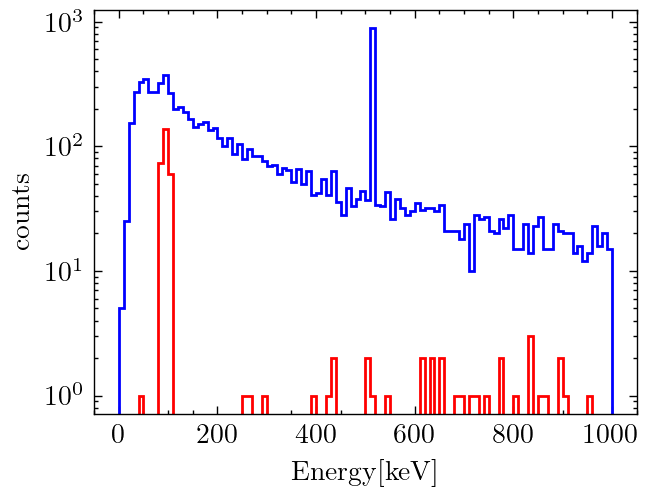

In [532]:
#plt.hist(data1['EDepDet'], bins=100, histtype='step', color='r', label='z>0',range=(0,1))
fig=plt.figure()
fig.dpi=200

Pb=data1[(data1['processName'] == 'GammaGeneralProc')]
general=data1[(data1['processName'] != 'GammaGeneralProc')]

plt.hist(np.multiply(data2['energy'],1000), bins=100, histtype='step', color='b',range=(0,1000))
plt.hist(np.multiply(Pb['energy'],1000), bins=100, histtype='step', color='r',range=(0,1000))

#plt.legend()
plt.yscale('log')
plt.xlabel('Energy[keV]')
plt.ylabel('counts')
plt.yscale('log')
plt.show()
plt.show()


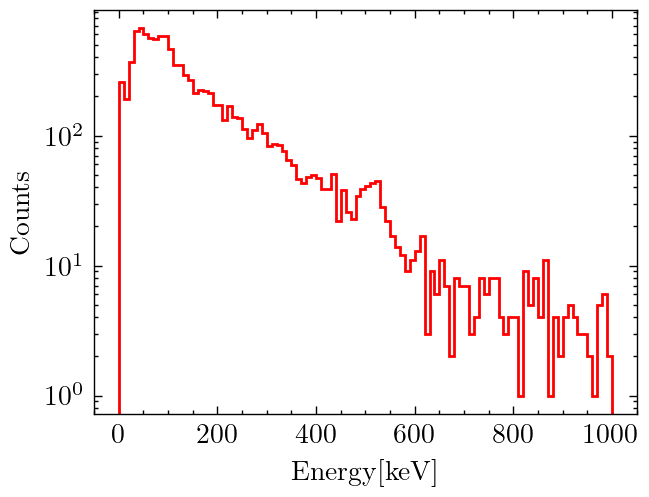

In [533]:
fig=plt.figure()
fig.dpi=200
plt.hist(np.random.normal((np.multiply(data1['EDepDet'],1000)),0.03*(np.multiply(data1['EDepDet'],1000))), bins=100, histtype='step', color='red',range=(0,1000))
#plt.legend()
#plt.yscale('log')
plt.xlabel('Energy[keV]')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()
plt.show()

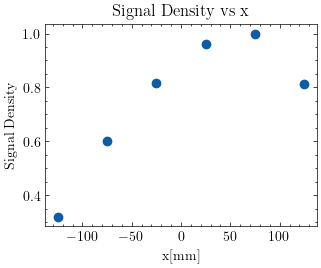

In [534]:
x=[-125,-75,-25,25,75,125]
sig=[4193,7894,10708,12633,13142,10699]
sig=np.array(sig)/np.max(sig)

plt.scatter(x,sig)
plt.xlabel('x[mm]')
plt.ylabel('Signal Density')
plt.title('Signal Density vs x')
plt.show()


Demonstration

-200
(4223298,)


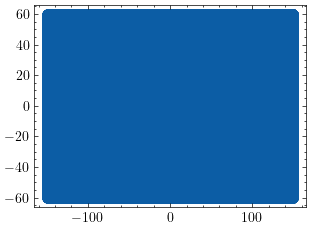

In [535]:
csv_file_path3 = 'build/gamma_entering_particles.csv'
#pos = int(csv_file_path3.split('_')[-1].split('.')[0])
#psov=-150+pos*10
psov=-200
print(psov)

df_gamma = pd.read_csv(csv_file_path3, delimiter=',', header=1, names=['Energy', 'X', 'Y', 'Z','pX', 'pY', 'pZ','evt'])

print(np.shape(df_gamma['X']))


plt.scatter(df_gamma['X'], df_gamma['Y'])
#plt.xlim(-150, 150)
#plt.ylim(-100, 100)
plt.show()

In [536]:

#mask = np.isclose(df_gamma['Energy'], 510.99, atol=0.1 * 510.99)

mask=df_gamma['Energy']==510.99
df_gamma_filtered = df_gamma[mask]



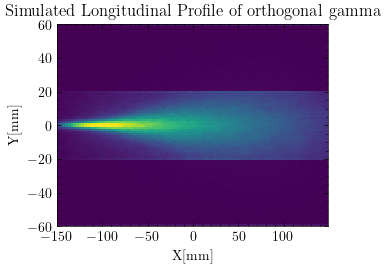

In [537]:
plt.hist2d(df_gamma['X'], df_gamma['Y'], bins=(100,100), cmap='viridis',range=[[-150, 149], [-60, 60]])
plt.xlabel('X[mm]')
plt.ylabel('Y[mm]')
plt.title('Simulated Longitudinal Profile of orthogonal gamma')
plt.show()

Angolare

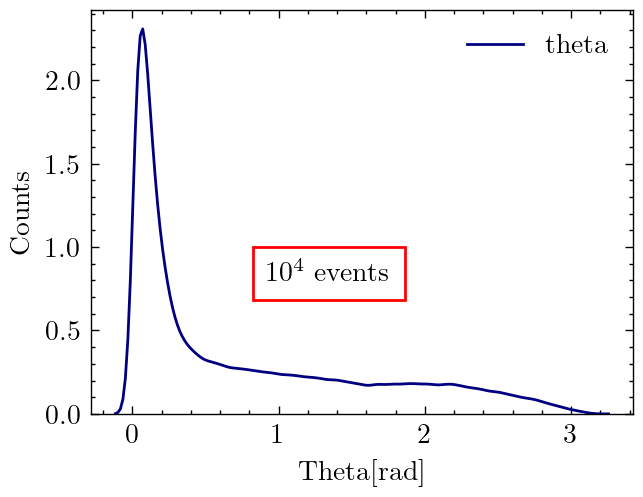

In [538]:
theta=np.arccos(df_gamma['pX']/np.sqrt(df_gamma['pX']**2+df_gamma['pY']**2+df_gamma['pZ']**2))
fig=plt.figure()
fig.dpi=200

sns.kdeplot(theta,  color='navy', label='theta',hue_norm=[0, 1],common_norm=True)
plt.xlabel('Theta[rad]')
plt.ylabel('Counts')
plt.legend()
plt.text(0.92, 0.8, r'$10^4$ events', bbox=dict(facecolor='white', edgecolor='red', boxstyle='square,pad=0.5'))

plt.show()

In [539]:
print(np.shape(df_gamma['evt'].unique()))

(10000,)


(1843671,)


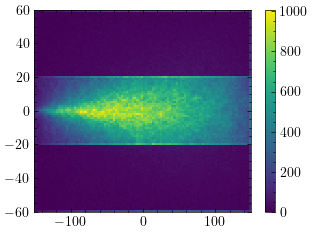

In [540]:
df_gamma['theta']=theta

df_gamma=df_gamma[np.isclose(df_gamma['theta'],1.5,atol=0.7*1.5)]
df_gamma.to_csv('gamma_entering_preproc150.csv', index=False)


print(np.shape(df_gamma['X']))

df_gamma['X'] = df_gamma['X'].mask((df_gamma['X'] >= psov) & (df_gamma['X'] <= psov+1), np.nan)
df_gamma['X'] = df_gamma['X'].mask((df_gamma['X'] >= psov+19) & (df_gamma['X'] <= psov+21), np.nan)


plt.hist2d(df_gamma['X'], df_gamma['Y'], bins=(100,100), cmap='viridis',range=[[-150, 150], [-60, 60]])
plt.colorbar()
plt.show()



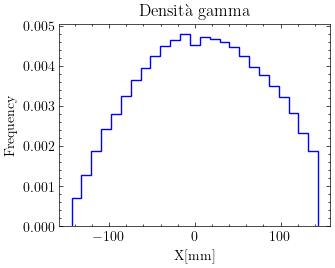

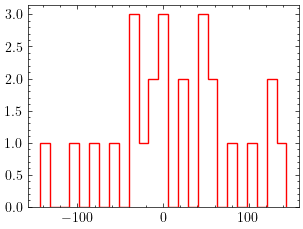

In [541]:





hist2d, x_edges, y_edges = np.histogram2d(df_gamma['X'], df_gamma['Y'], bins=(25, 1), range=[[-149.9, 149.9], [-100, 100]])

slice_index = 0

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

hist_slice = hist_slice / np.sum(hist_slice)    


bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=25,histtype='step',density=True)


# Add labels and title
plt.xlabel('X[mm]')
plt.ylabel('Frequency')
plt.title('Densità gamma')
plt.show()

sampled_value = np.random.choice(bin_centers_x, p=hist_slice,size=25)
sampled_value=np.sort(sampled_value, axis=None)


#np.save('gamma_sampled.npy', sampled_value)

plt.hist(sampled_value, histtype='step', color='r',bins=25)
# Show the plot
plt.show()

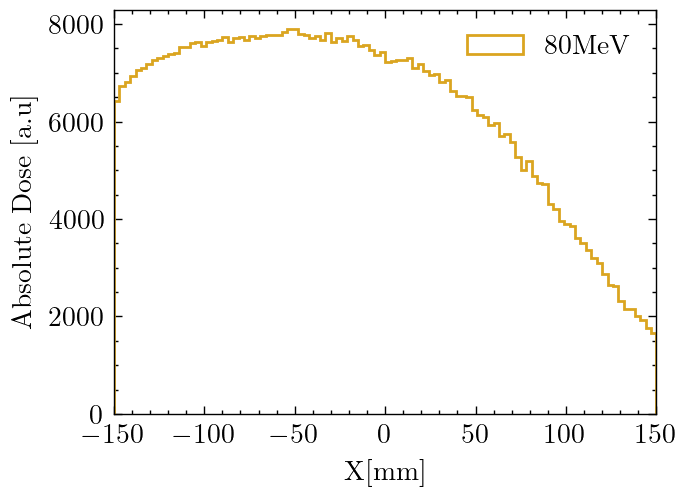

In [542]:

file = uproot.open("build/Hits.root")
tree = file["Hits"]

data = tree.arrays(library="pd")

edep= data['EDep']

xloc= data['xloc'] 

fig=plt.figure()
fig.dpi=200
hist, x_edges=np.histogram(xloc,weights=edep, bins=10000)

bin_centers = (x_edges[:-1] + x_edges[1:]) / 2


plt.hist(bin_centers, weights=hist, color='goldenrod'   , bins=100,histtype='step',range=(-150,150),label='80MeV')
plt.legend()
plt.xlabel('X[mm]')
plt.ylabel('Absolute Dose [a.u]')
plt.xlim(-150,150)






plt.show()









#sampled_value_dose = np.random.choice(bin_centers, p=hist,size=100000)
#
#sampled_value_dose=np.sort(sampled_value_dose, axis=None)

#np.save('dose_sampled.npy', sampled_value_dose)

#plt.hist(sampled_value_dose,bins=100 , color='blue',histtype='step',range=(-140,140))


# Show the plot
plt.show()



PLOT DOSE GAMMA

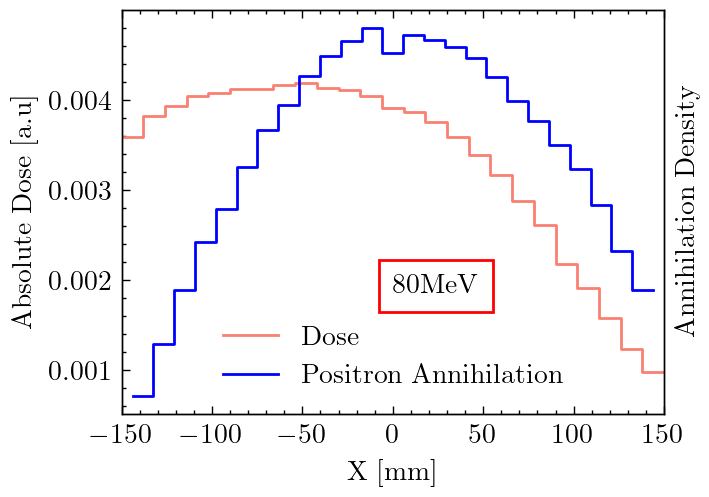

In [543]:
fig=plt.figure()
fig.dpi=200
ax=plt.gca()
# Plotting the dose
sns.histplot(x=bin_centers, weights=hist, color='salmon', bins=25, label='Dose', element='step',fill=False,stat='density')
plt.xlabel('X [mm]')
plt.ylabel('Absolute Dose [a.u]')

plt.xlim(-150, 150)

plt.legend()

# Plotting the gamma distribution
sns.histplot(x=bin_centers_x, weights=hist_slice, color='blue', bins=25, label='Positron Annihilation', element='step',fill=False,stat='density')

plt.legend()
plt.text(0.5, 0.3, '80MeV', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='red', boxstyle=' square,pad=0.5'))

# Add a right-side ylabel
plt.twinx()
plt.yticks([])
plt.ylabel('Annihilation Density ')

# Show the plot
plt.show()



In [561]:
# Read the data from the file
data = np.loadtxt("build/edep2d80N1.txt", delimiter=",")


[101]
(80, 20)


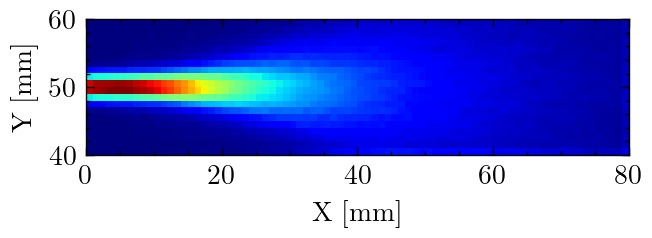

In [562]:
import seaborn as sns
fig, ax = plt.subplots()
fig.dpi=200
# Extract the x and y coordinates
x = data[:, 0]
y = data[:, 2]

data[:,3]=(data[:,3]/np.max(data[:,3]))*100
# Create a 2D histogram
#sns.kdeplot(x=x, y=y, weights=data[:,3], cmap='binary',fill=True,thresh=0.05,levels=100)

weights = (data[:, 3] / np.max(data[:, 3])) 

# Create a 2D histogram
h, xedges, yedges = np.histogram2d(x, y, bins=(80, 20), weights=weights,range=([0,80],[40,60]))
print(np.shape(x_edges))
print(np.shape(h))

# Plot the image
plt.imshow(h.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]] ,cmap='jet')

# Convert the image data to a 1D array
image_data = h.T.flatten()

# Save the image data to a CSV file
np.savetxt('image_data.csv', image_data, delimiter=',')


# Add labels and title
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')

plt.show()




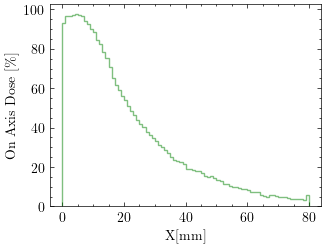

In [564]:

x1=np.linspace(0,80,80)
h=h*100

plt.hist(x=x1,weights=h[:,9], bins=80, histtype='step', color='green',alpha=0.5)
plt.xlabel('X[mm]')
plt.ylabel('On Axis Dose [\%]')
plt.show()

['build/fullsim/macrofull_150_30.root', 'build/fullsim/macrofull_140_30.root', 'build/fullsim/macrofull_100_30.root', 'build/fullsim/macrofull_130_30.root', 'build/fullsim/macrofull_80_30.root', 'build/fullsim/macrofull_50_30.root', 'build/fullsim/macrofull_70_30.root', 'build/fullsim/macrofull_90_30.root', 'build/fullsim/macrofull_120_30.root', 'build/fullsim/macrofull_110_30.root', 'build/fullsim/macrofull_60_30.root']


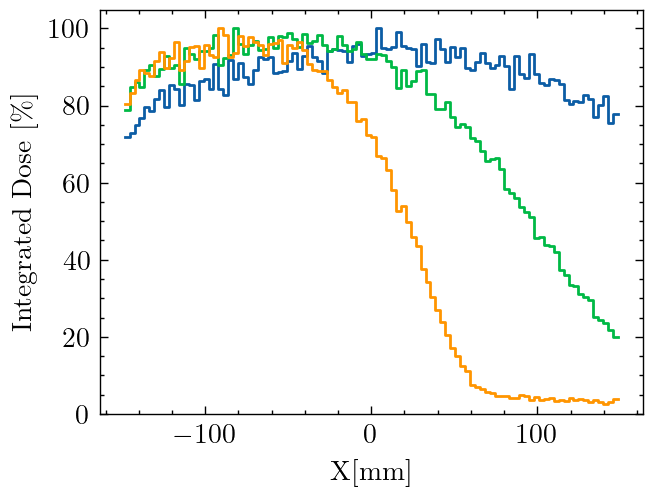

In [560]:
import glob
import uproot

# Get a list of all .root files in the fullsim directory
root_files = glob.glob('build/fullsim/*.root')
print(root_files)


root_files = ['build/fullsim/macrofull_150_30.root','build/fullsim/macrofull_80_30.root', 'build/fullsim/macrofull_50_30.root', ]

fig, ax = plt.subplots()
fig.dpi=200

for file in root_files:
    # Extract the number from the file name
    label = int(file.split('_')[1])
    
    # Open the root file and access the 'Hits' tree
    with uproot.open(file) as f:
        tree = f['Hits']
        
        # Read the 'Energy' branch from the tree
        energy = tree['EDep'].array()
        xloc = tree['xloc'].array()
        
        # Plot the histogram
        hist, x_edges=np.histogram(xloc,weights=energy, bins=100)
        
        bin_centers = (x_edges[:-1] + x_edges[1:]) / 2
        
        
        max_value = np.max(hist)
        normalized_hist = (hist / max_value) * 100
        
        #plt.hist(bin_centers, weights=normalized_hist , bins=100,histtype='step',range=(-150,150),label=label, alpha=0.7)
        sns.histplot(x=bin_centers, weights=normalized_hist, bins=100, label=label ,fill=False,element='step')
        

# Add labels and legend
ax.set_xlabel('X[mm]')
ax.set_ylabel('Integrated Dose [\%]')

# Show the plot
plt.show()
    